In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('seoul_5.csv', encoding = 'cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40221 entries, 0 to 40220
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40221 non-null  object 
 1   지점       40221 non-null  int64  
 2   평균기온(℃)  39465 non-null  float64
 3   최저기온(℃)  39464 non-null  float64
 4   최고기온(℃)  39463 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [7]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,40221.0,39465.000000,39464.000000,39463.000000
mean,108.0,11.704019,7.406393,16.716083
std,0.0,10.668056,10.891154,10.998383
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.600000,-1.500000,7.200000
50%,108.0,12.900000,8.000000,18.600000
75%,108.0,21.200000,17.000000,26.200000
max,108.0,33.700000,30.300000,39.600000


In [10]:
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
40216,2019-01-13,108,1.2,-3.0,7.6
40217,2019-01-14,108,1.4,-2.4,5.3
40218,2019-01-15,108,-1.7,-7.2,2.6
40219,2019-01-16,108,-5.2,-10.1,-1.1


In [15]:
# 결측치 제거
# 날짜 dateTime => 월일 잘라내기
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40221 entries, 0 to 40220
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       40221 non-null  datetime64[ns]
 1   지점       40221 non-null  int64         
 2   평균기온(℃)  39465 non-null  float64       
 3   최저기온(℃)  39464 non-null  float64       
 4   최고기온(℃)  39463 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.5 MB


In [16]:
df['Year'] = df['날짜'].dt.year
df['Month'] = df['날짜'].dt.month
df['Day'] = df['날짜'].dt.day
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),Year,Month,Day
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


In [18]:
df.columns = ['날짜','지점','평균기온','최저기온','최고기온','Year','Month','Day']
df.head()

,날짜,지점,평균기온,최저기온,최고기온,Year,Month,Day
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


In [24]:
df_0214 = df[(df['Month'] == 2)&(df['Day'] == 14)]
df_0214

,날짜,지점,평균기온,최저기온,최고기온,Year,Month,Day
136,1908-02-14,108,-3.3,-7.5,2.3,1908,2,14
502,1909-02-14,108,2.6,-4.5,8.8,1909,2,14
867,1910-02-14,108,-3.1,-10.1,2.8,1910,2,14
1232,1911-02-14,108,0.8,0.0,3.5,1911,2,14
1597,1912-02-14,108,6.3,0.9,11.2,1912,2,14
...,...,...,...,...,...,...,...,...
38422,2014-02-14,108,2.7,-0.7,7.6,2014,2,14
38787,2015-02-14,108,2.0,-3.1,6.6,2015,2,14
39152,2016-02-14,108,-2.6,-6.8,5.8,2016,2,14
39518,2017-02-14,108,0.3,-4.0,6.5,2017,2,14


In [32]:
df_year = df_0214['Year']
df_high = df_0214['최고기온']
df_low = df_0214['최저기온']

<ipython-input-75-561b426cbb51>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Year'], rotation = 90)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 

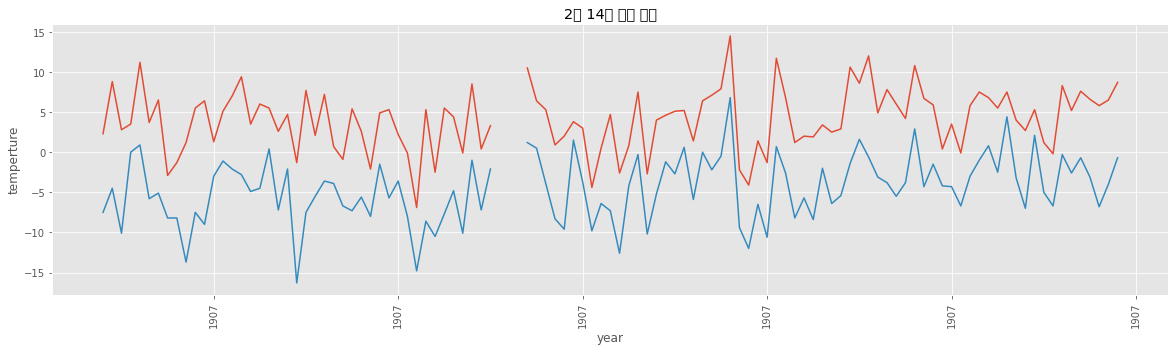

In [75]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1) 

ax.plot(df_year, df_0214['최고기온'], label = df['날짜'])
ax.plot(df_year, df_0214['최저기온'])
ax.set_title('2월 14일 기온 변화')
ax.set_xticklabels(df['Year'], rotation = 90)
ax.set_xlabel('year')
ax.set_ylabel('temperture')
plt.show()

In [40]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,Year,Month,Day
0,1907-10-01,108,13.5,7.9,20.7,1907,10,1
1,1907-10-02,108,16.2,7.9,22.0,1907,10,2
2,1907-10-03,108,16.2,13.1,21.3,1907,10,3
3,1907-10-04,108,16.5,11.2,22.0,1907,10,4
4,1907-10-05,108,17.6,10.9,25.4,1907,10,5


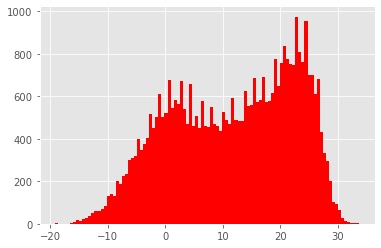

In [68]:
plt.style.use('ggplot')
plt.hist(df['평균기온'], bins = 100, color = 'r')
plt.show()

In [58]:
df.isnull().sum()

날짜         0
지점         0
평균기온     756
최저기온     757
최고기온     758
Year       0
Month      0
Day        0
dtype: int64

In [ ]:
df.isnull()

In [ ]:
plt.boxplot(df['평균기온'])

In [63]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df.isnull().sum()

날짜       0
지점       0
평균기온     0
최저기온     0
최고기온     0
Year     0
Month    0
Day      0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39463 entries, 0 to 40220
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      39463 non-null  datetime64[ns]
 1   지점      39463 non-null  int64         
 2   평균기온    39463 non-null  float64       
 3   최저기온    39463 non-null  float64       
 4   최고기온    39463 non-null  float64       
 5   Year    39463 non-null  int64         
 6   Month   39463 non-null  int64         
 7   Day     39463 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 2.7 MB


Text(0.5, 1.0, '1907년부터 2019년까지 서울의 평균기온')

C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  fon

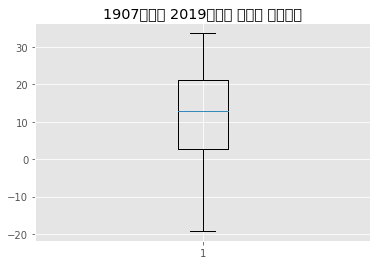

In [67]:
plt.style.use('ggplot')
plt.boxplot(df['평균기온'])
plt.title("1907년부터 2019년까지 서울의 평균기온")